In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


In [5]:
data = pd.read_csv('/content/drive/MyDrive/stock_sentiment.csv')
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [6]:
data.shape

(5791, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [8]:
data.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [9]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [11]:
def remove_punc(message):
  test2_remove = [char for char in message if char not in string.punctuation] 
  test2_join = ''.join(test2_remove)
  return test2_join

In [12]:
from gensim.utils import simple_preprocess

def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if len(token) >= 3 and token not in stop_words:
      result.append(token)
    
  return result

In [13]:
data['without_punctuation'] = data['Text'].apply( remove_punc)
data.head()

,Text,Sentiment,without_punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [14]:
data['without_stopwords'] = data['without_punctuation'].apply(preprocess)
data.head()

,Text,Sentiment,without_punctuation,without_stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]


In [15]:
def joined(message):
  text = [char for char in message ] 
  join1 = ' '.join(text)
  return join1
data['clean_data'] = data['without_stopwords'].apply(joined)
data.head()

,Text,Sentiment,without_punctuation,without_stopwords,clean_data
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [16]:
df = data[data.Sentiment == 1]
df.head()


,Text,Sentiment,without_punctuation,without_stopwords,clean_data
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [17]:
df_text = ''.join(df['without_punctuation'])
df_text1 = ' '.join(df['clean_data'])

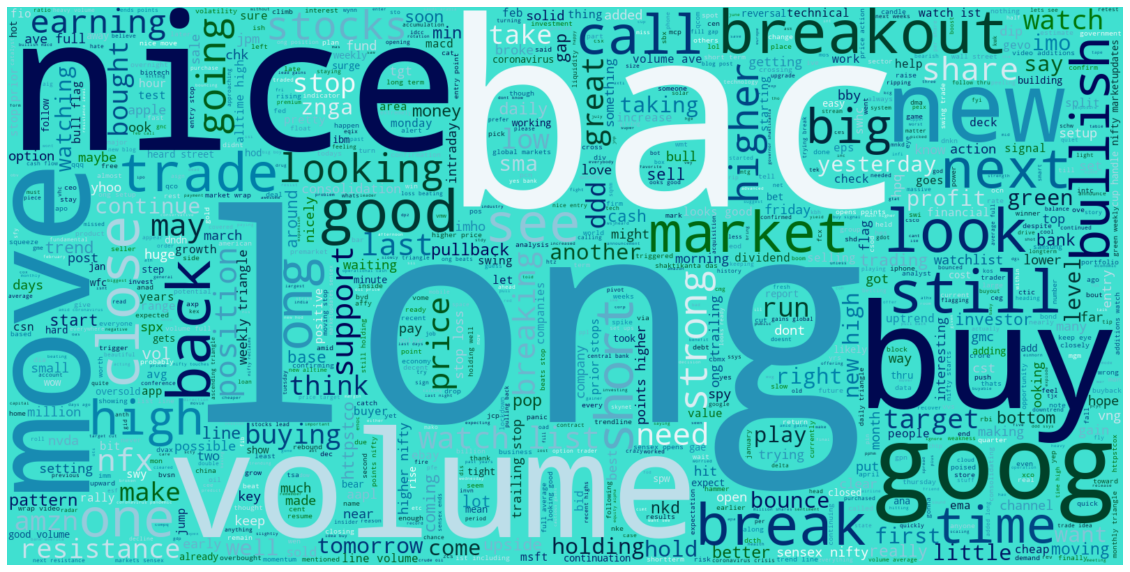

In [18]:
from wordcloud import WordCloud, STOPWORDS
wordcloud2 = WordCloud(width = 1600, height = 800, background_color='#40E0D0', colormap="ocean", max_words= 1000,).generate(df_text1)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
data['clean_data'][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

In [21]:
print(nltk.word_tokenize(data['clean_data'][0]))

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [22]:
x =-1
for i in data['clean_data']:
  a = nltk.word_tokenize(i)
  if len(a) > x:
    x = len(a)
print("max number of words: ", x)


max number of words:  20


In [23]:
list1 = []
for i in data['clean_data']:
  a = nltk.word_tokenize(i)
  leng = len(a)
  list1.append(leng)
print(list1)



[14, 6, 7, 1, 0, 1, 8, 13, 8, 4, 10, 18, 8, 8, 11, 5, 12, 10, 12, 4, 6, 5, 2, 5, 3, 10, 3, 3, 9, 6, 8, 10, 8, 3, 10, 11, 4, 8, 11, 10, 10, 7, 9, 8, 4, 10, 8, 7, 7, 9, 10, 10, 8, 2, 14, 12, 9, 8, 1, 14, 7, 11, 5, 13, 6, 6, 7, 6, 6, 10, 9, 4, 10, 13, 16, 6, 9, 6, 2, 11, 5, 4, 9, 11, 16, 4, 9, 5, 6, 2, 1, 5, 9, 4, 7, 6, 7, 10, 1, 3, 9, 4, 16, 8, 10, 11, 18, 6, 7, 13, 12, 9, 3, 3, 10, 10, 8, 6, 8, 5, 5, 8, 9, 15, 3, 5, 9, 18, 13, 11, 3, 1, 1, 2, 7, 12, 12, 8, 8, 10, 9, 10, 15, 8, 9, 9, 12, 10, 6, 10, 13, 4, 11, 8, 15, 13, 8, 12, 5, 5, 3, 7, 2, 4, 10, 5, 6, 10, 6, 16, 9, 6, 5, 10, 9, 10, 8, 2, 10, 9, 10, 12, 7, 10, 7, 3, 6, 5, 9, 9, 4, 6, 5, 4, 4, 8, 10, 8, 8, 13, 9, 7, 10, 12, 8, 6, 5, 3, 10, 11, 6, 9, 10, 13, 10, 7, 12, 7, 11, 10, 4, 4, 3, 10, 2, 9, 10, 15, 12, 10, 13, 9, 8, 2, 1, 12, 12, 6, 9, 9, 12, 5, 2, 3, 8, 6, 14, 5, 6, 7, 9, 1, 1, 11, 7, 14, 4, 4, 9, 5, 4, 9, 9, 10, 13, 5, 11, 4, 4, 6, 1, 8, 4, 11, 4, 6, 11, 4, 10, 8, 8, 6, 10, 3, 10, 10, 2, 9, 10, 13, 9, 10, 3, 2, 8, 4, 6, 14, 5, 

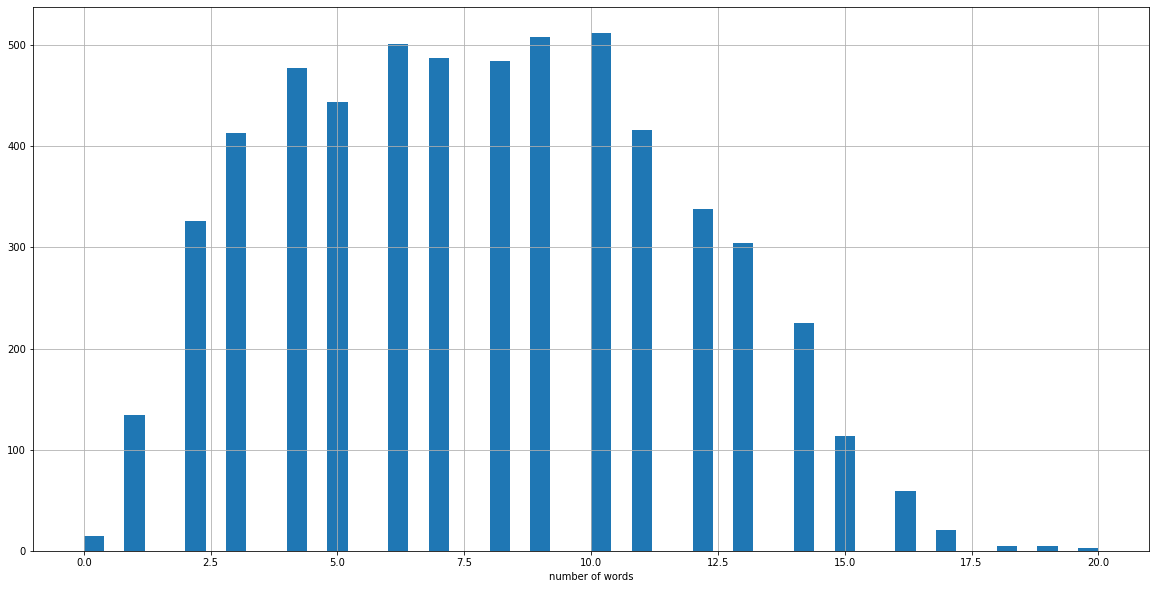

In [24]:
plt.figure(figsize = (20,10))
plt.hist(x = list1, bins = 50)
plt.xlabel('number of words')
plt.grid()
plt.show()


In [25]:
list2 = []
for i in data['without_stopwords']:
  for j in i :
    list2.append(j)

In [26]:
print(list2)

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts', 'movie', 'return', 'feageed', 'indicator', 'trades', 'awesome', 'afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks', 'mnta', 'pgnx', 'current', 'downtrend', 'break', 'otherwise', 'shortterm', 'correction', 'medterm', 'downtrend', 'mondays', 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'chk', 'biib', 'goog', 'ower', 'trend', 'line', 'channel', 'test', 'volume', 'support', 'watch', 'tomorrow', 'ong', 'entry', 'assuming', 'fcx', 'opens', 'tomorrow', 'trigger', 'buy', 'still', 'much', 'like', 'setup', 'really', 'worries', 'everyone', 'expects', 'market', 'rally', 'nowusually', 'exact', 'opposite', 'happens', 'every', 'time', 'shall', 'see', 'soon', 'bac', 'spx', 'jpm', 'gamcos', 'arry', 'haverty', 'apple', 'extremely', 'cheap', 'great', 'video', 'maykiljil', 'posted', 'agree', 'msft', 'going', 'higher', 'possibly', 'n

In [27]:
len(list2)

45099

In [28]:
uni_words = len(list(set(list2)))
uni_words

9268

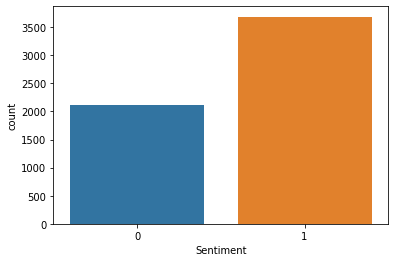

In [29]:
sns.countplot(x = 'Sentiment', data = data )
plt.show()

In [30]:
data.head()

,Text,Sentiment,without_punctuation,without_stopwords,clean_data
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [31]:
x = data['without_stopwords']
y = data['Sentiment']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)# spliting in train and test data 90% train and 10% test data

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5211,) (580,) (5211,) (580,)


In [33]:
print(x_train)

4789                                  [jcp, short, float]
4066    [hca, entering, long, heres, daily, like, volu...
192                       [jpm, hod, hungry, stocks, spy]
4897    [ddd, shows, support, good, buy, along, xone, ...
2350    [ptrend, exhausted, started, form, downward, c...
                              ...                        
3910    [would, like, see, long, red, candles, aapl, s...
3808    [funny, listen, ppl, play, one, side, mrkt, ex...
1742               [come, spy, goes, daily, aapl, growth]
4376            [jcp, biggest, hustle, wall, street, shd]
5317    [property, bets, lose, curb, appeal, age, coro...
Name: without_stopwords, Length: 5211, dtype: object


In [34]:
tokenizer = Tokenizer(num_words= uni_words)
tokenizer.fit_on_texts(x_train)


In [35]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

In [36]:
train_seq

[[179, 1, 647],
 [1901, 1902, 4, 2466, 81, 3, 2, 123, 35],
 [133, 386, 2467, 26, 60],
 [68, 606, 35, 5, 14, 702, 961, 1531, 1903, 1091, 962, 770, 105, 12, 96, 3622],
 [1904, 2468, 486, 963, 703, 222, 703, 487, 165, 63, 35, 69, 151],
 [112, 65],
 [10,
  80,
  26,
  434,
  2469,
  3623,
  1532,
  2470,
  3624,
  1092,
  1533,
  2471,
  3625,
  3626,
  3627,
  457],
 [113, 118, 1905, 3628],
 [1534, 3629, 3630, 78, 3631, 3632, 2472, 222, 3633, 3634, 607, 3635],
 [704, 166, 14, 13, 3636, 264, 39],
 [1093, 139, 12, 31, 58, 2],
 [2473, 3637, 3638, 2474, 771, 1535],
 [3639, 40, 239, 28, 73, 106, 608],
 [705],
 [964, 458, 772, 57, 31, 1906, 387],
 [488, 1094, 223, 323, 459, 1907, 460, 252, 1908],
 [3640, 1536, 3641, 36, 193, 3642],
 [6, 1299, 1299, 3643, 25, 364, 3644, 6, 518, 118, 291, 706],
 [3645, 22, 72, 861, 306, 307, 171, 647, 87, 1],
 [224, 120, 2475, 342, 204, 1095, 1300, 1096, 99, 33, 365, 1909],
 [1301, 3646, 1301, 2476],
 [29, 1097, 63],
 [20, 773, 1537, 42, 186, 2477, 488],
 [2478, 

In [37]:
test_seq

[[271, 714, 3, 597, 1071, 4053, 11, 190],
 [236, 10, 80, 913, 58, 2, 209, 93],
 [335, 88, 20, 16, 335, 8, 43],
 [32, 30, 110],
 [5940, 1763, 1319, 539, 6087, 6785, 1428, 347, 5211, 2048],
 [147, 3862, 180, 41],
 [280, 278, 379, 50, 176, 6375, 40, 239, 166, 57, 44, 203, 253, 2036],
 [68, 1087, 368, 17],
 [1062, 375, 182, 1062, 375, 182, 3529, 375, 113, 3529, 1052, 113, 210, 53],
 [41, 192],
 [773, 1252, 658, 821, 3551, 5718, 422, 3624, 4587, 2332],
 [742, 260, 4, 31, 9, 3885, 119, 294],
 [1179, 606, 358, 597, 65, 2641, 1053, 15, 476],
 [57, 737, 149, 1209],
 [276, 439, 1, 102, 98, 439, 36, 530, 21, 2594, 428, 2878, 1377],
 [7, 430, 28, 1836, 5, 96, 192, 234],
 [1185, 12, 198, 608],
 [6632, 5],
 [278, 669, 447, 456, 418, 100, 659, 401],
 [312, 526, 1187],
 [81, 151, 545, 116, 94, 173, 230],
 [51, 177, 327, 44, 3402, 454, 1400, 1231, 839],
 [10, 80, 45, 1512, 2, 93, 209],
 [1032, 76, 1167, 346],
 [759, 317, 442, 1411, 50, 16, 1167],
 [303, 8220, 8350, 152, 583, 102, 449, 15, 1203],
 [1065

In [38]:
print(x_train[0])

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [39]:
print(train_seq[0])

[179, 1, 647]


In [40]:
print(x_train[2])
print(train_seq[2])

['afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks']
[133, 386, 2467, 26, 60]


In [41]:
padded_train = pad_sequences(train_seq, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_seq, maxlen = 29, padding = 'post', truncating = 'post')
print(padded_train[0])
print(padded_test[0])

[179   1 647   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
[ 271  714    3  597 1071 4053   11  190    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [42]:
for i, value in enumerate(padded_train[0:3]):
  print(value)

[179   1 647   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
[1901 1902    4 2466   81    3    2  123   35    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[ 133  386 2467   26   60    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [43]:
y_2d_train = to_categorical(y_train, 2)
y_2d_train.shape

(5211, 2)

In [44]:
y_2d_test = to_categorical(y_test, 2)
y_2d_test.shape

(580, 2)

In [45]:
print(y_2d_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [46]:
padded_train = pad_sequences(train_seq, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_seq, maxlen = 15, truncating = 'post')


**Build a custom based deep neural network**


In [47]:
model = Sequential()

model.add(Embedding(uni_words, output_dim = 512))
model.add(LSTM(256))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(padded_train, y_2d_train, batch_size = 32, validation_split = 0.2, epochs = 2 )

Epoch 1/2
131/131 [==============================] - 28s 199ms/step - loss: 0.5910 - acc: 0.6891 - val_loss: 0.5158 - val_acc: 0.7478
Epoch 2/2
131/131 [==============================] - 25s 194ms/step - loss: 0.3265 - acc: 0.8721 - val_loss: 0.4976 - val_acc: 0.7689


**prediction**

In [49]:
Predict_test = model.predict(padded_test)
print(Predict_test)

[[0.08288625 0.9171137 ]
 [0.0486776  0.95132244]
 [0.35635668 0.64364326]
 ...
 [0.21070397 0.78929603]
 [0.5711973  0.42880276]
 [0.7415846  0.2584154 ]]


In [50]:
list3 = []
for i in Predict_test:
  list3.append(np.argmax(i))
list3

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [51]:
list4 = []
for i in y_2d_test:
  list4.append(np.argmax(i))

list4

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list4, list3)
accuracy


0.7379310344827587

In [53]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(list4,list3)
cm

array([[ 86, 130],
       [ 22, 342]])

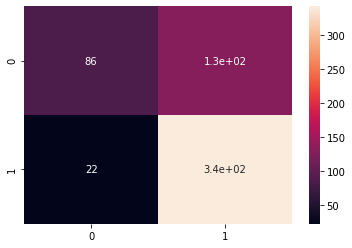

In [54]:
sns.heatmap(cm, annot = True )